# Assignment 8
Raghav Juyal \
EP20BTECH11018

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.correlation import bootstrap_two_point_angular

# Question 1
Calculate the angular two-point correlation function of galaxies (including errors obtained by 10 bootstrap resamples) \
using subset of data from the Blanco Cosmology Survey with r-band magnitude between 17 and 20, and using 16 logarithmic-spaced \
angular bins from 1/60◦ to 1◦. Use a linear scale for Y-axis. Galaxies in Blanco Cosmology Survey have spread model > 0.002. \
This data can be downloaded from http://www.iith.ac.in/~shantanud/BCS05hr_reduced.txt

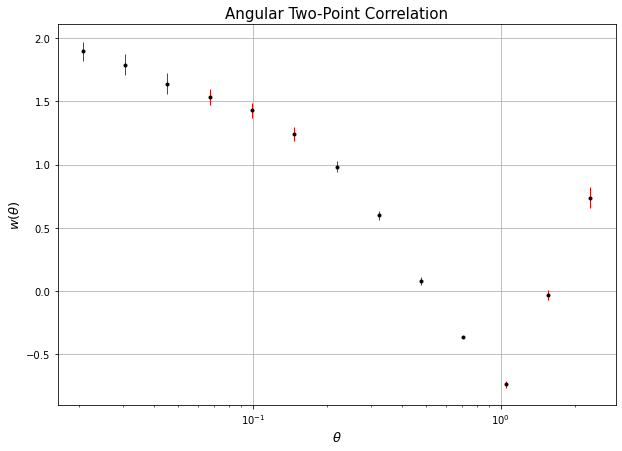

In [2]:
# extracting input data from website
data = np.loadtxt('https://www.iith.ac.in/~shantanud/BCS05hr_reduced.txt')

# filtering the data according to parameters
data = data[data[:,2] < 20]
data = data[data[:,2] > 17]
data = data[data[:,3] > 0.002]

# function for finding angular two-point correlation
def two_point_correlation(N):
    LINS = np.linspace(np.log10(1.0/60.0), np.log10(6), 16)
    bins = 10 ** LINS
    results = [bins]
    for d in [data]:
        results += bootstrap_two_point_angular(d[:,0], d[:,1], bins=bins, method='landy-szalay', Nbootstraps=N)
    return results

# applying function according to the question asked
(bins, b_corr, b_corr_err, b_bootstraps) = two_point_correlation(10)
# finding bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# plotting the values from angular two-point correlation
plt.figure(figsize=(10,7))
plt.xscale('log')
plt.yscale('linear')
plt.errorbar(bin_centers, b_corr, b_corr_err, fmt='.k', ecolor='red', lw=1)
plt.xlabel(r'$\theta$', size = 13)
plt.ylabel(r'$w(\theta)$', size = 13)
plt.title('Angular Two-Point Correlation', size = 15)
plt.grid()
plt.show()